### Multi Linear Regression

In [53]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import MultipleLinearRegression
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [10]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [13]:
regr = LinearRegression()
model = regr.fit(X_train, y_train)

In [15]:
y_pred = model.predict(X_test)
y_pred

array([ 0.22322801,  0.66085607,  0.71896486,  0.01697943,  0.90886541,
        0.87300866,  0.51474927, -0.32107403, -0.12142306,  0.50251911,
        0.70133382,  0.28683225,  0.85502517,  0.07768618,  1.07982865,
        0.90192371,  1.05686498,  0.22094761, -0.12900175, -0.01083944,
        0.6427156 , -0.07146388,  0.39761404,  0.70469926,  0.87215593,
        0.60543118,  0.86052301,  0.52192428, -0.11982245,  0.85106779,
        0.07899444,  0.07699755, -0.12807495,  0.22990341,  0.74290479,
        0.1928511 ,  0.66207763,  0.76757829,  0.70687733,  0.72752393,
        0.49912847,  0.66991539,  0.74577378,  0.67432315,  0.74462001,
       -0.25518   ,  0.67407126,  0.9109717 ,  0.21034324, -0.00379678,
        0.10730328, -0.16248314,  0.80195822,  1.03700455,  0.31385101,
       -0.28616245,  0.13270179,  0.96702499,  0.02538572, -0.21164807,
        0.16572643,  0.84786267,  0.16832954,  0.57910201,  0.74004433,
        0.15297831,  0.69925356,  0.64606158,  0.71258336,  0.91

In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


Mean squared error: 0.12082078745507815


In [30]:
accuracy=r2_score(y_test,y_pred)*100

accuracy

51.36858060344728

Text(0, 0.5, 'Predicted')

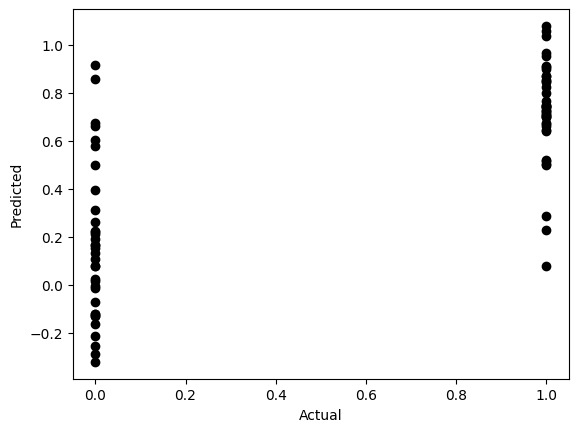

In [35]:
plt.scatter(y_test,y_pred, color='black')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='target'>

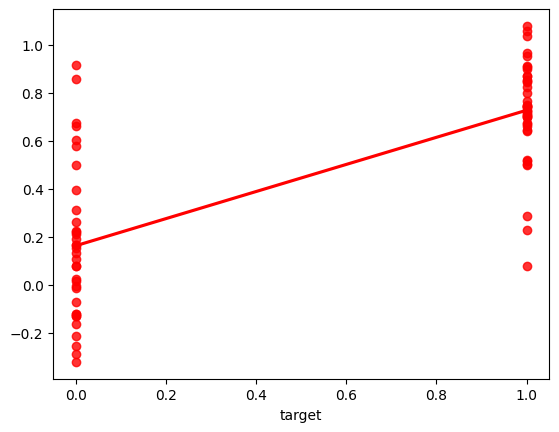

In [37]:
sns.regplot(x=y_test,y=y_pred,ci=None, color ='red')

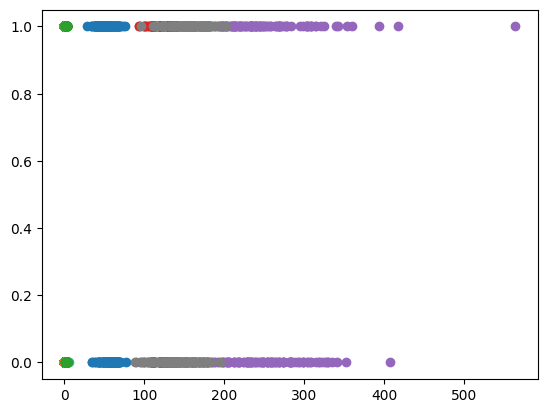

In [42]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train)

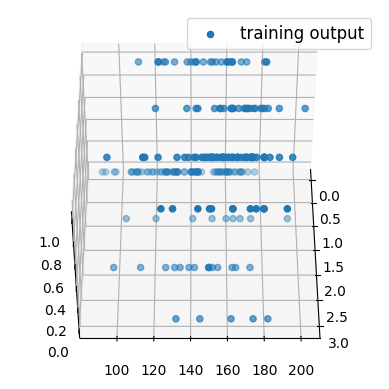

In [65]:
mpl.rcParams['legend.fontsize'] = 12
 
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
 
ax.scatter(X_train['cp'], X_train['thalach'], y_train, label ='training output')
ax.legend()
ax.view_init(45, 0)

#### Let's test if our model gives us a prediction for this patient given below.

In [23]:
df.iloc[0:1, :]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [25]:
new_patient = pd.DataFrame(df.iloc[0:1, :], columns=X.columns)

disease_pred = regr.predict(new_patient)

print('Predicted disease:', disease_pred[0])


Predicted disease: 0.7427112839466818


In [26]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')